In [ ]:
#Experiment 1: Curve Fitting Using Linear Regression

In [ ]:
#To execute the code, execute all cells and then run the main() function call provided in the last cell

In [13]:
import os
import random

from pandas import read_csv
from matplotlib import pyplot
from numpy import arange
from scipy.optimize import curve_fit

In [14]:
# Function to evaluate the value of a linear polynomial
def linear(x,a,b):
    return a*x + b

In [15]:
# Function to evaluate the value of a quadratic polynomial
def quadratic(x,a,b,c):
    return a*(x**2) + b*x + c

In [16]:
# Function to evaluate the value of a cubic polynomial
def cubic(x,a,b,c,d):
    return a*(x**3) + b*(x**2) + c*x + d

In [17]:
# Function to evaluate the value of a biquadratic polynomial
def biquadratic(x,a,b,c,d,e):
    return a*(x**4) + b*(x**3) + c*(x**2) + d*x + e

In [52]:
# Function to generate a random polynomial, and randomly sample points
def generate_points(n=4, coefficients=None, number_of_points = 20):
    # generate random coefficients if coefficients aren't provided
    if not coefficients:
        coefficients = []
        for i in range(n+1):
            coefficients.append(random.randint(-2,10))
    x_coord, y_coord = [], []
    for i in range(min(number_of_points, 25)):
        x = random.randint(0,10)
        while x in x_coord:
            x = random.randint(-10,10)
        y = coefficients[0]
        for i in range(1,n+1):
            y += coefficients[i]*(x**i)
        x_coord.append(x)
        y_coord.append(y)
    return coefficients, x_coord, y_coord

In [81]:
def main(degree):
    coefficients, x, y = generate_points(n=degree, coefficients=None)
    polynomial = []
    for i in range(degree+1):
        polynomial.append(f"{coefficients[i]}x^{i}")
    polynomial = polynomial[::-1]
    print("The polynomial generated is: "+" + ".join(i for i in polynomial) + "\n")
    print("Attempting to fit curve and plot them.\n")
    # Fitting linear curve
    popt, _ = curve_fit(linear, x, y)
    a,b = popt
    print(f"Nearest Linear Curve : y = {a}*x + {b}")
    pyplot.scatter(x,y)
    x_line1 = arange(min(x), max(x), 1)
    y_line1 = linear(x_line1, a, b)
    pyplot.plot(x_line1, y_line1, '--', color='red', label="linear")
    
    #Fitting Quadratic Curve
    popt, _ = curve_fit(quadratic, x, y)
    a,b,c = popt
    print(f"Nearest Quadratic Curve : y = {a}x^2 + {b}x + {c}")
    pyplot.scatter(x,y)
    x_line2 = arange(min(x), max(x), 1)
    y_line2 = quadratic(x_line2, a, b, c)
    pyplot.plot(x_line2, y_line2, '--', color='blue', label="quadratic")

    #Fitting Cubic Curve
    popt, _ = curve_fit(cubic, x, y)
    a,b,c,d = popt
    print(f"Nearest Cubic Curve : y = {a}x^3 + {b}x^2 + {c}x + {d}")
    pyplot.scatter(x,y)
    x_line3 = arange(min(x), max(x), 1)
    y_line3 = cubic(x_line3, a, b, c, d)
    pyplot.plot(x_line3, y_line3, '--', color='orange', label="cubic")

    #Fitting Biquadratic Curve
    popt, _ = curve_fit(biquadratic, x, y)
    a,b,c,d,e = popt
    print(f"Nearest Biquadratic Curve : y = {a}x^4 + {b}x^3 + {c}x^2 + {d}x + e")
    pyplot.scatter(x,y)
    x_line4 = arange(min(x), max(x), 1)
    y_line4 = biquadratic(x_line4, a, b, c, d, e)
    pyplot.plot(x_line4, y_line4, '--', color='green', label="biquadratic")
    pyplot.legend(loc="upper right")

The polynomial generated is: 8x^5 + 7x^4 + 10x^3 + 4x^2 + 7x^1 + -1x^0

Attempting to fit curve and plot them.

Nearest Linear Curve : y = 36422.74291338447*x + 36658.22869947559
Nearest Quadratic Curve : y = 2328.714456924153x^2 + 34094.02843284308x + -40189.35248727946
Nearest Cubic Curve : y = 917.3333365782275x^3 + 952.7143045810546x^2 + -19936.905000467577x + -12944.544978745753
Nearest Biquadratic Curve : y = 26.99999968526763x^4 + 863.3333346598967x^3 + -1295.9999694001585x^2 + -17661.190540808744x + e


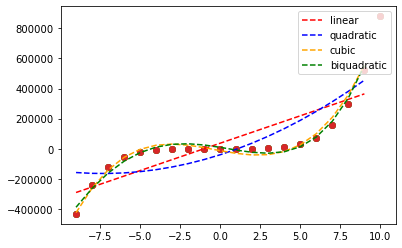

In [82]:
# passing the equation degree as parameter to main() function
main(5)